## Prediction of Diabetes by using Patients record
### Author: Aniket Tanaji Dabade

* Description

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

* Content

The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.


* Problem Statemtent
By using these patient records, we will try to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not

* Data Description

Columns:

Pregnancies - Number of times pregnant

Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure - Diastolic blood pressure (mm Hg)

SkinThickness - Triceps skin fold thickness (mm)

Insulin - 2-Hour serum insulin (mu U/ml)

BMI - Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction - Diabetes pedigree function

Age - Age (years)

Outcome - Class variable (0 or 1) 268 of 768 are 1, the others are 0


## Importing Liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## Reading the Data from the CSV file

In [2]:
data=pd.read_csv(r"C:\Users\admin\Desktop\PiAnalytix_internship\PROJECT-2\RAW DATA\diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


## Exploratory Data Analysis (EDA)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# To know more about the dataset with transpose (Optional)
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [8]:
# Checking if there is some null values or not
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

On these columns, a value of zero does not make sense and thus indicates missing value.

Following columns or variables have an invalid zero value: Glucose, BloodPressure, SkinThickness, Insulin, BMI. It is better to replace zeros with NAN since after that counting them would be easier and zeros need to be replaced with suitable values.


In [9]:
data.shape

(768, 9)

In [10]:
data=data.rename(columns={'Outcome':'Dibetes_Status'})

In [11]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Dibetes_Status
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [12]:
# Creating a copy of Dataset
data_copy=data.copy(deep=True) #the copy is a "deep copy" meaning that any changes made in the original DataFrame will NOT be reflected in the copy.

In [13]:
data_copy.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Dibetes_Status'],
      dtype='object')

In [14]:
# Replacinhg 0 with NaN
data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']]=data_copy[['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI']].replace(0,np.NaN)

In [15]:
data_copy.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Dibetes_Status                0
dtype: int64

In [16]:
data_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Dibetes_Status
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [17]:
data_copy.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Dibetes_Status
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1
767,1,93.0,70.0,31.0,NaN,30.4,0.315,23,0


## Data Visualization

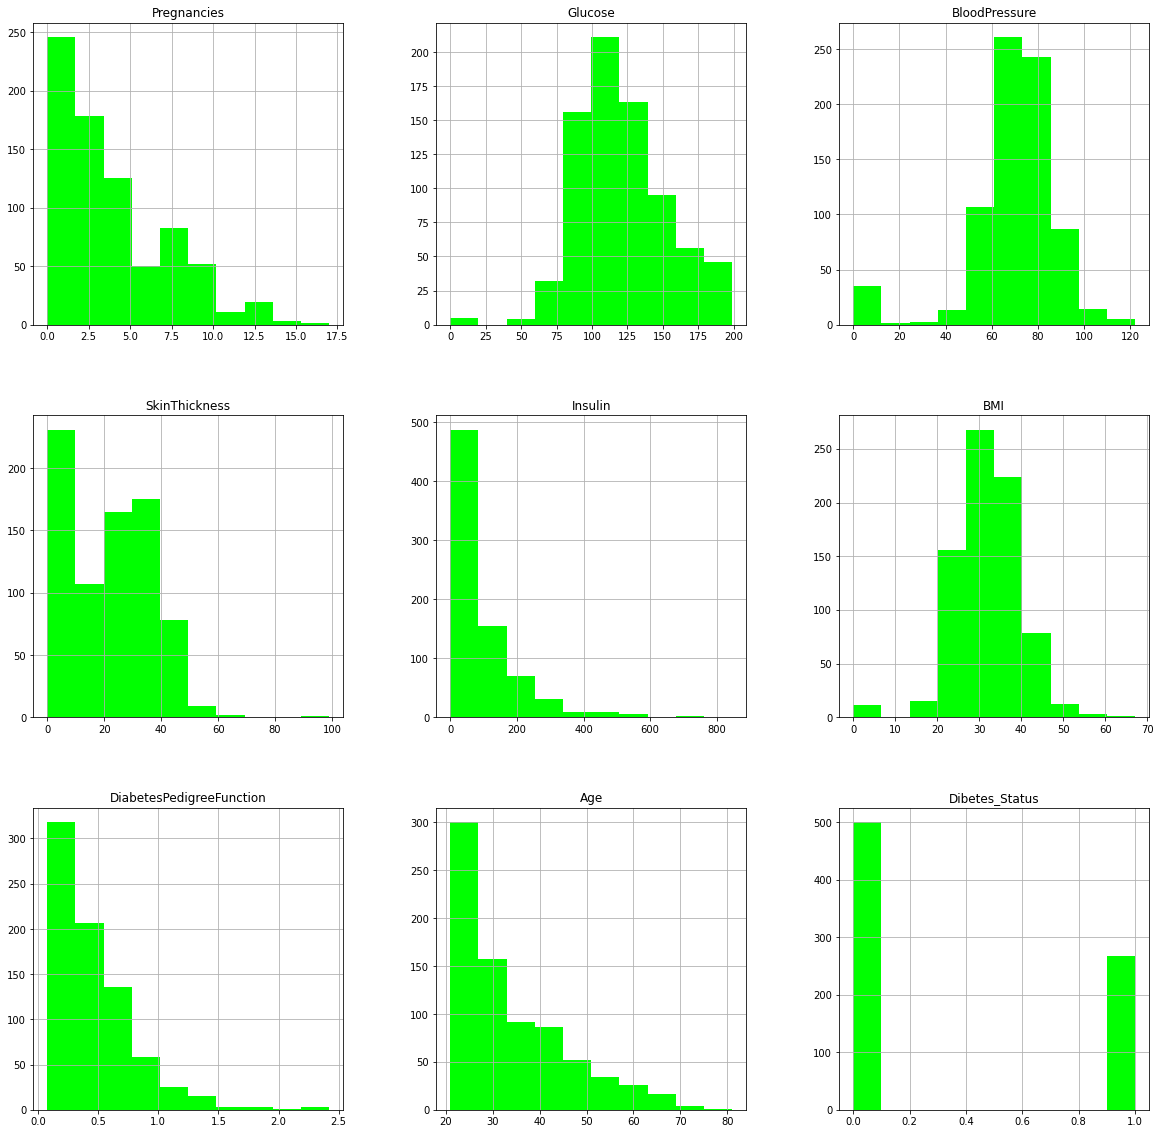

In [18]:
# Plotting the data distribution plots
plot=data.hist(figsize=(20,20),color='lime')

In [19]:
# Replacing NaN values with Mean values
data_copy['Glucose'].fillna(data_copy['Glucose'].mean(),inplace=True)
data_copy['BloodPressure'].fillna(data_copy['BloodPressure'].mean(),inplace=True)
data_copy['SkinThickness'].fillna(data_copy['SkinThickness'].mean(),inplace=True)
data_copy['Insulin'].fillna(data_copy['Insulin'].mean(), inplace=True)
data_copy['BMI'].fillna(data_copy['BMI'].mean(), inplace=True)

In [20]:
data_copy

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Dibetes_Status
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.00000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.00000,155.548223,36.8,0.340,27,0
765,5,121.0,72.0,23.00000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,29.15342,155.548223,30.1,0.349,47,1


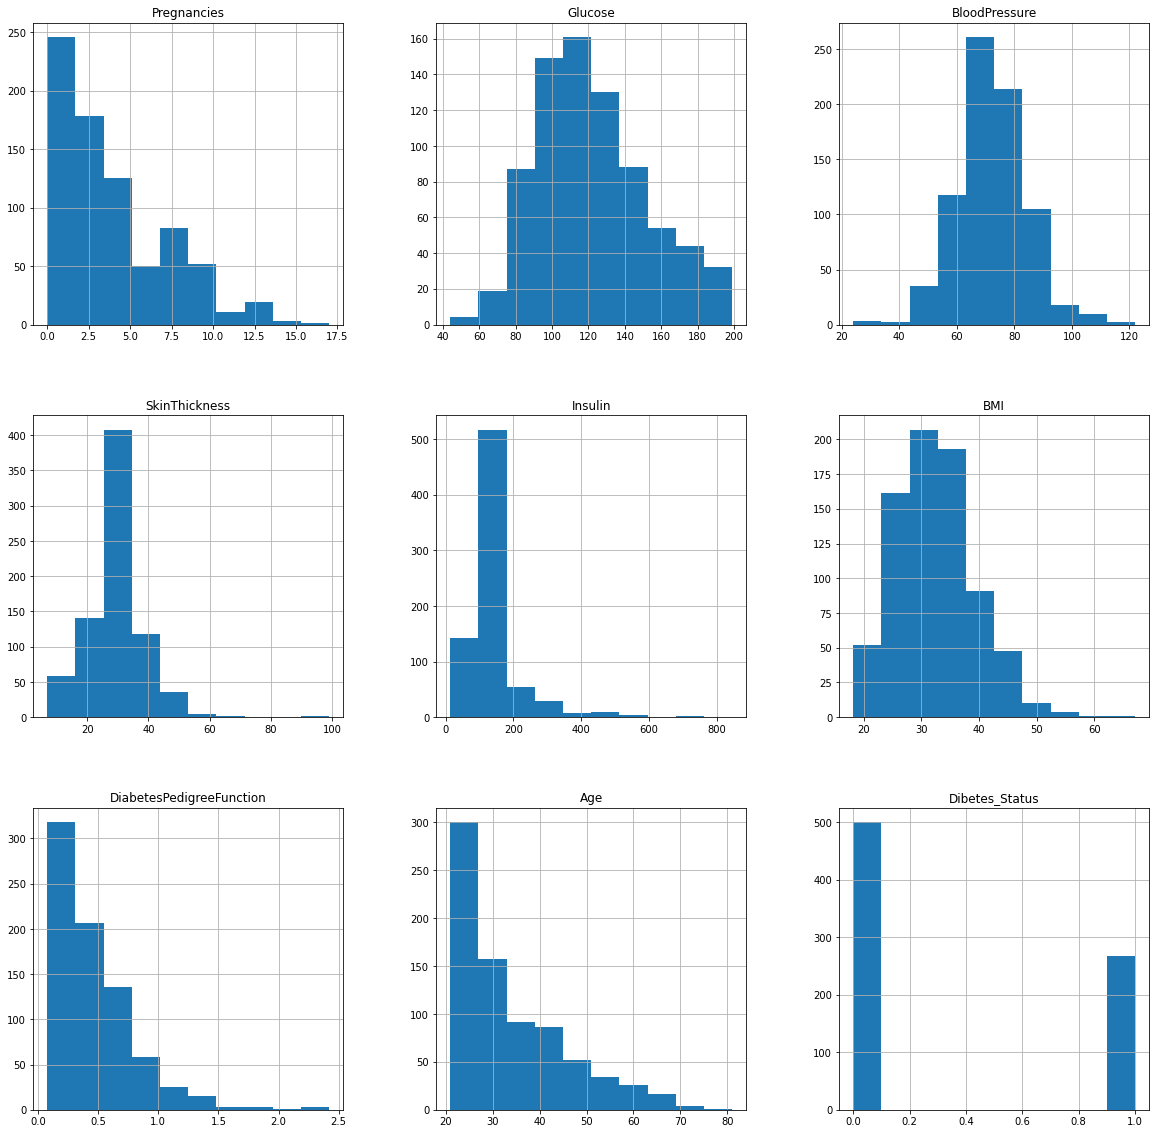

In [21]:
# Plotting the distributions after removing the NAN values
plot=data_copy.hist(figsize=(20,20))

(array([500.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 268.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

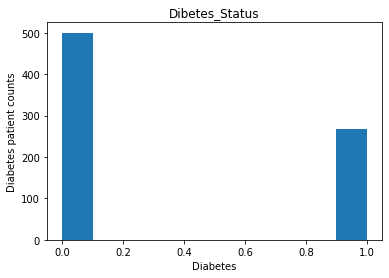

In [22]:
# Checking the balance of the data by plotting the count of Dibetes_Status by their value
plt.xlabel('Diabetes')
plt.ylabel('Diabetes patient counts')
plt.title('Dibetes_Status')
x = data_copy['Dibetes_Status']
plt.hist(x)

The above graph shows that the data is biased towards datapoints having outcome value as 0 where it means that diabetes was not present actually. The number of non-diabetics is almost twice the number of diabetic patients

In [23]:
data_copy.groupby('Dibetes_Status').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Dibetes_Status,,,,,,,,
0,3.298000,110.710121,70.935397,27.768651,142.210761,30.888434,0.429734,31.190000
1,4.865672,142.165573,75.147324,31.736944,180.431548,35.384757,0.550500,37.067164


In [24]:
data_copy['Dibetes_Status'].value_counts()

0    500
1    268
Name: Dibetes_Status, dtype: int64

## Correlation between all the features

<AxesSubplot:>

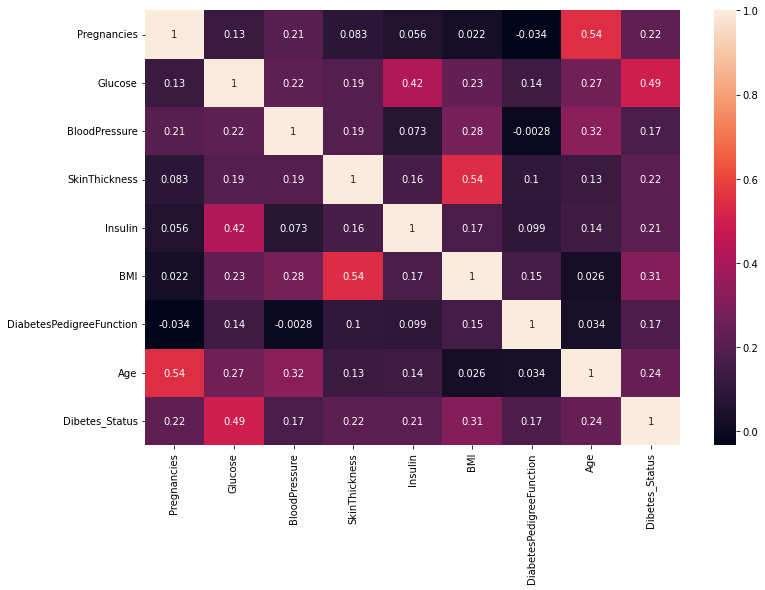

In [25]:
# Correlstion between all the features after cleaning
plt.figure(figsize=(12,8))
sns.heatmap(data_copy.corr(),annot=True)

In [26]:
data_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Dibetes_Status
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


In [27]:
x=data_copy.iloc[: ,:8 ]
y=data_copy.iloc[:,8]

In [28]:
x.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33


In [29]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Dibetes_Status, dtype: int64

## Splitting the data into Train and Test

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=0)

In [32]:
x_train.shape

(614, 8)

In [33]:
x_test.shape

(154, 8)

In [34]:
y_train.shape

(614,)

In [35]:
y_test.shape

(154,)

## Scaling the data

In [36]:
from sklearn.preprocessing import StandardScaler

In [37]:
sc_X = StandardScaler() 
# Scaling the target value is a good idea in knn modelling; scaling of the data makes it easy for a model to learn and understand the problem.Scaling of the data comes under the set of steps of data pre-processing when we are performing machine learning

In [38]:
x_train=sc_X.fit_transform(x_train)

In [39]:
x_test=sc_X.transform(x_test)

In [40]:
x_train

array([[ 0.90832902,  0.93627156,  0.44607305, ...,  0.36780137,
         0.67740401,  1.69955804],
       [ 0.03644676, -0.81645845, -1.05366073, ..., -0.63382702,
        -0.07049698, -0.96569189],
       [-1.12606292,  1.43232723,  1.44589558, ...,  2.81463643,
        -0.11855487, -0.88240283],
       ...,
       [ 0.03644676, -0.91566959, -0.63706802, ..., -1.13464121,
        -0.95656442, -1.04898095],
       [ 2.0708387 , -1.21330299,  0.11279888, ..., -0.36195646,
        -0.50001442,  0.11706589],
       [ 0.32707418,  0.47328628,  0.77934723, ..., -0.02462752,
         0.52121586,  2.94889395]])

In [41]:
x_test

array([[-0.8354355 ,  2.55672007,  0.27943597, ...,  1.46959259,
         2.78594417, -0.96569189],
       [-0.54480808, -0.48575468,  0.11279888, ...,  0.13885774,
        -0.1876381 , -0.88240283],
       [ 0.03644676, -1.51093639, -0.88702365, ...,  0.19609364,
        -0.22668514, -0.71582471],
       ...,
       [ 0.03644676,  0.67170854,  1.1126214 , ...,  1.62699134,
         0.53623395, -0.96569189],
       [-0.25418066, -0.18812128,  0.11279888, ..., -0.90569758,
        -1.07971278, -0.79911377],
       [-0.8354355 , -0.48575468, -0.05383821, ..., -0.26179362,
         1.06487079, -0.79911377]])

## Model Building
## K-Nearest Neighbor (KNN)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix 

In [43]:
classifier= KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean') #K value i.e n_neighbors=11 is taken as Sq. root of test data (sq. rt of y_test: 154=12.40, but we will take odd value i.e 12.40-1=11 )

In [44]:
classifier.fit(x_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [45]:
y_pred=classifier.predict(x_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

## Confusion Matrix

In [46]:
# A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm.
cm=confusion_matrix(y_test,y_pred) 
cm

array([[94, 13],
       [16, 31]], dtype=int64)

Array Expalined:

[TP=94, FN=13]

[FP=16, TN=31]

In [47]:
from sklearn.metrics import f1_score
f1_score(y_test,y_pred) # F1 score calculation: 2*((precision * Recall)/(precision + Recall)) ; here Recall=(TP/(TP+FN)) & Precision=TP/(TP+FP)

0.6813186813186813

In [48]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,y_pred) # Accuray_score calculation: (TP+TN)/(TP+TN+FP+FN); (94+31)/(94+31+16+13)

0.8116883116883117

## Conclusion

### After using all these these patient records, we are able to build a machine learning model to accurately predict whether or not the patients in the dataset have diabetes or not.
